---

# `Instruções para o teste`

## ⚠️ Importante

Antes de iniciar, não esqueça de renomear esse documento substituindo o texto **SEU_NOME** no título com o nome de quem for resolver.

Deixe as respostas bem sinalizadas e comentadas e mencionando a qual questão se refere.

Fique à vontade para utilizar quantas células forem necessárias.

<br><br>

## 📖 Recursos Permitidos
✅ Documentação, sites, fóruns  
❌ Inteligências Artificiais (ChatGPT, Claude, etc.)

<br><br>

## 📤 Instruções para Entrega

**Ao finalizar o teste** volte a este passo e execute a célula abaixo.

**Envie o arquivo gerado e o arquivo do seu notebook para o e-mail:** `mateus.camacho@tdwbi.com.br`

- Arquivo gerado: `historico_exec.txt` <br>
- Seu notebook: `teste_spark_SEU_NOME.ipynb`


In [ ]:
### EXECUTE ESTA CÉLULA APENAS AO FINAL DO TESTE ###

%history -t /content/historico_exec.txt
from google.colab import files
files.download('/content/historico_exec.txt')

---

# `Questões e Contexto`

## 📁 Contexto

No diretório raiz desse documento, existem os três arquivos que serão necessários para a conclusão dessa atividade. Em caso de dúvidas, a pasta de se encontra no desktop dessa máquina na pasta 'pyspark_test'.

Os dados são fictícios e compreendem uma simulação de um cenário de uma loja de departamentos, para isso temos os arquivos com as seguintes informações:
- **users.csv** → Dados dos clientes/usuários da loja
- **sales.csv** → Dados das vendas
- **products.json** → Dados de cadastro dos produtos

<br><br>

## 📝 Questões

A atividade consiste nas questões a seguir:

**1.** Declare um novo dataframe que mostre o nome do produto e o valor final da compra.

**2.** Declare um novo dataframe com o valor total gasto por cliente.

**3.** Declare um novo dataframe com os cinco melhores clientes contendo o nome, e-mail e o valor gasto em todo o período.

**4.** Declare um novo dataframe com os cinco produtos mais vendidos nos últimos seis meses (considerando período de dados disponível nos arquivos) contendo o nome do produto e a quantidade de produtos vendidos nesse período.

**5.** Calcular a média de faturamento por cliente e o desvio padrão.

**6.** Classificar os clientes em três categorias: silver, gold, platinum
- **platinum:** clientes que gastaram mais que a média de faturamento por cliente;
- **gold:** clientes que gastaram do menor desvio padrão até a média de faturamento por cliente;
- **silver:** clientes que gastaram no máximo a média menos o desvio padrão do faturamento por cliente;

**7.** Salvar um arquivo parquet com os três produtos mais consumidos de cada categoria do cliente.

---

# `Configuração do ambiente`

**Execute as células abaixo antes de iniciar o teste.**

Os arquivos serão criados automaticamente e estarão disponíveis no ícone de pasta do menu lateral (conforme imagem abaixo) ou na pasta **content**.

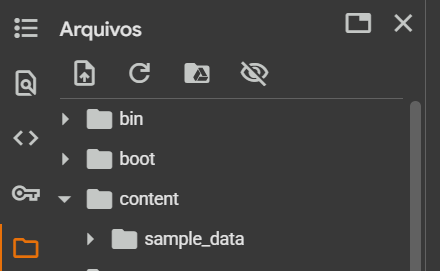


In [1]:
### IMPORTANDO ARQUIVOS QUE SERÃO USADOS NO TESTE ###

!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json -O products.json
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv -O sales.csv
!wget https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/users.csv -O users.csv

path_products = "/content/products.json"
path_sales = "/content/sales.csv"
path_users = "/content/users.csv"

--2025-09-02 18:55:01--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/products.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3186 (3.1K) [text/plain]
Saving to: ‘products.json’

products.json       100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-09-02 18:55:01 (33.8 MB/s) - ‘products.json’ saved [3186/3186]

--2025-09-02 18:55:01--  https://raw.githubusercontent.com/KaelDucatti/pyspark_test_data/main/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24411 (24K) [text/plain]


In [130]:
### IMPORTANDO BIBLIOTECAS NECESSÁRIAS ###

from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window

In [3]:
### INSTANCIANDO SPARK ###

spark = SparkSession.builder.appName('test-spark').getOrCreate()

---

# Seu teste começa aqui 🍀 Boa sorte!

In [39]:
df_products = spark.read.json('./products.json')
df_products = df_products.withColumn('price', regexp_replace(col('price'), '\\$', '').cast(FloatType()))
df_products.printSchema()
df_products.show(5)

root
 |-- price: float (nullable = true)
 |-- product: string (nullable = true)
 |-- product_id: long (nullable = true)

+------+----------------+----------+
| price|         product|product_id|
+------+----------------+----------+
|  86.5|     Camisa Polo|         1|
|112.11|     Calça Jeans|         2|
|100.19|Vestido de Verão|         3|
| 82.38| Tênis Esportivo|         4|
| 101.5| Camiseta Básica|         5|
+------+----------------+----------+
only showing top 5 rows



In [32]:
df_sales = spark.read.csv('./sales.csv', header=True)
df_sales = df_sales.withColumn('qtde', col('qtde').cast(IntegerType()))
df_sales = df_sales.withColumn('date', to_date(col('date'), 'dd/MM/yyyy'))
df_sales.printSchema()
df_sales.show(5)

root
 |-- sale_id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- product_id: string (nullable = true)
 |-- client_id: string (nullable = true)
 |-- qtde: integer (nullable = true)

+-------+----------+----------+---------+----+
|sale_id|      date|product_id|client_id|qtde|
+-------+----------+----------+---------+----+
|      1|2022-06-13|        30|      223|   2|
|      2|2022-11-16|        23|      175|   2|
|      3|2022-08-18|        29|      184|   2|
|      4|2022-03-13|        31|      194|   1|
|      5|2022-12-14|        13|      221|   2|
+-------+----------+----------+---------+----+
only showing top 5 rows



In [7]:
df_users = spark.read.csv('./users.csv', header=True)
df_users.show(5)

+---------+-------------------+--------------------+------+--------------+----------------+
|client_id|               name|               email|gender|         login|        password|
+---------+-------------------+--------------------+------+--------------+----------------+
|        1|   Mitch Kilpatrick|mkilpatrick0@cdc.gov|     M|  mkilpatrick0|      uE9+F7h5*P|
|        2|          Kit Kyncl|kkyncl1@miitbeian...|     M|       kkyncl1|        nZ1>gR%L|
|        3|    Marylou Presman|mpresman2@twitter...|     F|     mpresman2|        aP2#@KQI|
|        4|   Gilberta Andrieu|gandrieu3@4shared...|     M|     gandrieu3|oN2/1oW(IPSNWwoW|
|        5|Tobiah Boughtflower|tboughtflower4@pa...|     M|tboughtflower4| hD7{HV(oHo'C&P.|
+---------+-------------------+--------------------+------+--------------+----------------+
only showing top 5 rows



In [126]:
df_sales_total = df_sales.join(df_products, on='product_id', how='inner')
df_sales_total = df_sales_total.join(df_users, on='client_id', how='inner')
df_sales_total = df_sales_total.withColumn('Total Value', df_sales_total.price * df_sales_total.qtde)
df_sales_total.show()

+---------+----------+-------+----------+----+------+------------------+--------------------+--------------------+------+---------------+----------------+-----------+
|client_id|product_id|sale_id|      date|qtde| price|           product|                name|               email|gender|          login|        password|Total Value|
+---------+----------+-------+----------+----+------+------------------+--------------------+--------------------+------+---------------+----------------+-----------+
|      223|        30|      1|2022-06-13|   2|107.25|     Blusa Cropped|     Kiele Reichardt|kreichardt66@furl...|     F|   kreichardt66|    gW5+<jBzUad\|      214.5|
|      175|        23|      2|2022-11-16|   2|109.19|Camiseta Estampada|        Liva Boswood|lboswood4u@illino...|     M|     lboswood4u|   cP3/fQcBo1cvX|     218.38|
|      184|        29|      3|2022-08-18|   2|122.27|     Óculos de Sol|Elfie Mac Giolla ...|    emac53@ifeng.com|     F|         emac53|        dL2#oouC|     244.54

In [127]:
#Questão 1
df_sales_total.select(col('product'), col('Total Value')).show(5)


+------------------+-----------+
|           product|Total Value|
+------------------+-----------+
|     Blusa Cropped|      214.5|
|Camiseta Estampada|     218.38|
|     Óculos de Sol|     244.54|
|        Bolsa Tote|     105.96|
|     Camisa Social|     161.52|
+------------------+-----------+
only showing top 5 rows



In [119]:
#Questão 2
df_total_expense_by_client = df_sales_total.groupBy('name', 'client_id').agg(sum('Total Value').alias('Gasto Total'))
df_total_expense_by_client = df_total_expense_by_client.withColumn('Gasto Total', round(col('Gasto Total'), 2))
df_total_expense_by_client.select(col('name'), col('Gasto Total')).show()




+-------------------+-----------+
|               name|Gasto Total|
+-------------------+-----------+
|      Cory Housiaux|     787.38|
|  Vivianna Arnholtz|    1205.24|
|    Collette Ladell|     811.12|
|      Dulcy Birkett|    1518.37|
|        Blayne Sirr|      95.66|
|    Paulette Bracer|     818.59|
|      Eben Fairhead|     212.41|
|Margarethe Prigmore|    1713.44|
|       Cary Syddall|    1107.99|
|      Maurits Scade|    1041.72|
|  Hilliard Wadforth|     669.54|
|   Kristien Whitlaw|     1080.8|
|        Lem Millott|     191.32|
|       Allyson Calf|     489.83|
|       Jewel Bootes|     278.89|
|      Sammie Gidley|    1114.88|
|     Ganny Richards|    1278.64|
|        Curr Whisby|    1205.36|
|        Lynne Volet|    1008.74|
|  Dewitt Christofle|     330.18|
+-------------------+-----------+
only showing top 20 rows



In [77]:
#Questão 3

df_top_5_clients = df_sales_total.groupBy('name', 'email').agg(sum('Total Value').alias('Gasto Total')).orderBy(col('Gasto Total').desc()).limit(5)
df_top_5_clients = df_top_5_clients.withColumn('Gasto Total', round(col('Gasto Total'), 2))
df_top_5_clients.show()


+-----------------+--------------------+-----------+
|             name|               email|Gasto Total|
+-----------------+--------------------+-----------+
|Randa Friedenbach|rfriedenbach3m@pa...|    2240.51|
|  Giuditta Blease|gblease6s@friendf...|    1902.85|
|     Cher Higford| chigfordn@issuu.com|    1843.35|
|    Keen Juggings|kjuggings5j@phoca.cz|    1795.86|
|    Alfie Pattlel|apattlelu@discuz.net|     1755.6|
+-----------------+--------------------+-----------+



In [95]:
#Questão 4
df_top_5_products = df_sales_total.filter(col('date') >= date_sub(to_date(lit('2022-12-30')), 180)).groupBy('product').agg(sum('qtde').alias('qtde Total')).orderBy(col('qtde Total').desc()).limit(5)
df_top_5_products.show()



+--------------------+----------+
|             product|qtde Total|
+--------------------+----------+
|          Macaquinho|        39|
|Blusa de Manga Longa|        34|
|      Bolsa de Couro|        27|
|     Mochila de Lona|        27|
|   Casaco de Inverno|        27|
+--------------------+----------+



In [111]:
#Questão 5
df_mean_std = df_sales_total.groupBy('name').agg(mean('Total Value').alias('Media'), stddev('Total Value').alias('Desvio Padrão'), count('Total Value').alias('Contagem vendas'))
df_mean_std= df_mean_std.fillna(0, subset=['Desvio Padrão'])
df_mean_std.show()


+-------------------+------------------+------------------+---------------+
|               name|             Media|     Desvio Padrão|Contagem vendas|
+-------------------+------------------+------------------+---------------+
|       Karel Laight|226.10800018310547| 104.4691214958583|              5|
|     Melita Drewson|133.06499671936035|47.437659724430205|              4|
|  Shandeigh Ferries|222.38000106811523|147.78532266278503|              2|
|      Enid Couthard|233.27000427246094| 89.70357748250237|              2|
|Tobiah Boughtflower|224.22000122070312|               0.0|              1|
|       Cary Syddall|  276.997501373291| 67.73184585466649|              4|
|      Ferrel Orriss| 157.0520004272461| 72.74503706913426|              5|
|    Giuditta Blease|190.28500061035157| 97.16151070155102|             10|
|     Christye Ryton| 281.1974906921387| 66.24854471195366|              4|
|     Tedman Gerssam|208.78800506591796|117.04776272862307|              5|
|  Skipton C

In [121]:
#Questão 6
df_metrics = df_total_expense_by_client.agg(mean('Gasto Total').alias('Media'), stddev('Gasto Total').alias('DP'))
metrics = df_metrics.collect()[0]
media = metrics.Media
desvio_padrao = metrics.DP

df_classification = df_total_expense_by_client.withColumn('Categoria', when(col('Gasto Total') > media, 'Platinum').when(col('Gasto Total') > media - desvio_padrao, 'Gold').otherwise('Silver'))
df_classification.select(col('name'), col('Gasto Total'), col('Categoria')).show()


+-------------------+-----------+---------+
|               name|Gasto Total|Categoria|
+-------------------+-----------+---------+
|      Cory Housiaux|     787.38| Platinum|
|  Vivianna Arnholtz|    1205.24| Platinum|
|    Collette Ladell|     811.12| Platinum|
|      Dulcy Birkett|    1518.37| Platinum|
|        Blayne Sirr|      95.66|   Silver|
|    Paulette Bracer|     818.59| Platinum|
|      Eben Fairhead|     212.41|   Silver|
|Margarethe Prigmore|    1713.44| Platinum|
|       Cary Syddall|    1107.99| Platinum|
|      Maurits Scade|    1041.72| Platinum|
|  Hilliard Wadforth|     669.54|     Gold|
|   Kristien Whitlaw|     1080.8| Platinum|
|        Lem Millott|     191.32|   Silver|
|       Allyson Calf|     489.83|     Gold|
|       Jewel Bootes|     278.89|   Silver|
|      Sammie Gidley|    1114.88| Platinum|
|     Ganny Richards|    1278.64| Platinum|
|        Curr Whisby|    1205.36| Platinum|
|        Lynne Volet|    1008.74| Platinum|
|  Dewitt Christofle|     330.18

In [132]:
#Questão 7
df_sales_by_category = df_sales_total.groupBy('Categoria', 'product').agg(sum('qtde').alias('Total vendido'))
df_sales_by_category.show()

window_category = Window.partitionBy('Categoria').orderBy(col('Total vendido').desc())
df_top_3_products = df_sales_by_category.withColumn('Ranking', row_number().over(window_category)).filter(col('Ranking') <= 3)
df_top_3_products.show()

df_top_3_products.write.parquet('top_3_products.parquet')

